<a href="https://colab.research.google.com/github/wonjunchoi-arc/tensorflow/blob/main/%EC%9E%90%EC%97%B0%EC%96%B4%EC%B2%98%EB%A6%AC%EC%82%AC%EC%A0%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get update 
!apt-get install g++ openjdk-8-jdk 
!pip install konlpy JPype1-py3 
!pip install nltk

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:12 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:14 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:15 http://ppa.launchpad.net/grap

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import json
import os
import tqdm

from konlpy.tag import Okt

import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss, accuracy_score,f1_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# train = pd.read_csv('/content/drive/MyDrive/dacon/train.csv')#usecols=원하는 컬럼 가져오기
train = pd.read_csv('/content/drive/MyDrive/dacon/train.csv')#원하는 컬럼 가져오기                    
test = pd.read_csv('/content/drive/MyDrive/dacon/test.csv')

sample_submission = pd.read_csv('/content/drive/MyDrive/dacon/sample_submission.csv', header=0)

In [ ]:
#데이터 구조 파악
print(train.shape)
print(test.shape)
print(sample_submission.shape)
print(train.head())
print(train.label)

(174304, 13)
(43576, 12)
(43576, 2)
   index  제출년도  ...                                          요약문_영문키워드 label
0      0  2016  ...  nucleotide sequence, molecular marker, species...    24
1      1  2019  ...  TRAIL,Colorectal cancer,TRAIL resistance,Apopt...     0
2      2  2016  ...  functional cellulose fiber,natural fiber,funct...     0
3      3  2018  ...  Molecular diagnosis,Fluorescence,probe,antibod...     0
4      4  2016  ...  BRCA,Insituhybridization,tissuemicroarray,micr...     0

[5 rows x 13 columns]
0         24
1          0
2          0
3          0
4          0
          ..
174299     0
174300     0
174301     0
174302    23
174303     0
Name: label, Length: 174304, dtype: int64


In [ ]:
train.label.value_counts(sort=False)/len(train)

0     0.817945
1     0.007234
2     0.001578
3     0.000820
4     0.000327
5     0.009742
6     0.000447
7     0.000648
8     0.001945
9     0.000608
10    0.003775
11    0.001147
12    0.001538
13    0.003299
14    0.009592
15    0.000947
16    0.002903
17    0.000884
18    0.008893
19    0.028330
20    0.006076
21    0.002846
22    0.000849
23    0.010556
24    0.020195
25    0.004647
26    0.001813
27    0.003557
28    0.002576
29    0.005898
30    0.001342
31    0.005290
32    0.001492
33    0.003058
34    0.003001
35    0.001669
36    0.006081
37    0.001526
38    0.001503
39    0.001159
40    0.002530
41    0.000384
42    0.000293
43    0.002014
44    0.000522
45    0.006523
Name: label, dtype: float64

과제명 길이 최댓값: 229
과제명 길이 최솟값: 2
과제명 길이 평균값: 35.84252225995961
과제명 길이 중간값: 34.0


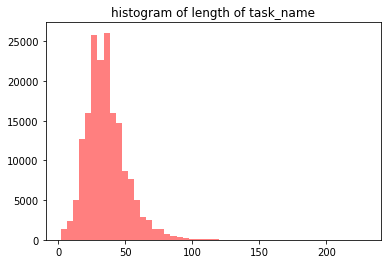

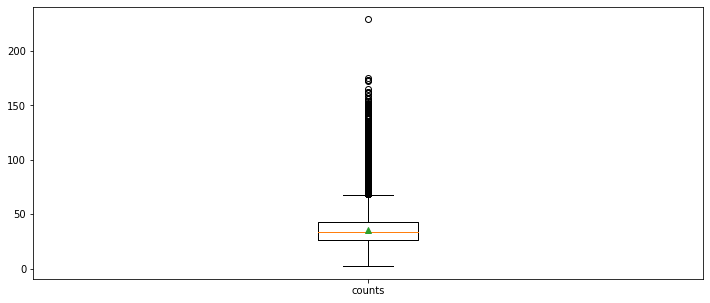

In [ ]:
length=train['과제명'].astype(str).apply(len)
plt.hist(length, bins=50, alpha=0.5, color='r', label='word')
plt.title('histogram of length of task_name')
plt.figure(figsize=(12, 5))
plt.boxplot(length, labels=['counts'], showmeans=True)
print('과제명 길이 최댓값: {}'.format(np.max(length)))
print('과제명 길이 최솟값: {}'.format(np.min(length)))
print('과제명 길이 평균값: {}'.format(np.mean(length)))
print('과제명 길이 중간값: {}'.format(np.median(length)))

요약문_연구목표 길이 최댓값: 3951
요약문_연구목표 길이 최솟값: 1
요약문_연구목표 길이 평균값: 318.1008066366807
요약문_연구목표 길이 중간값: 249.0


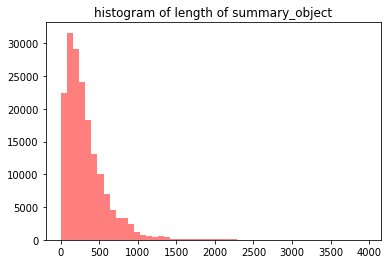

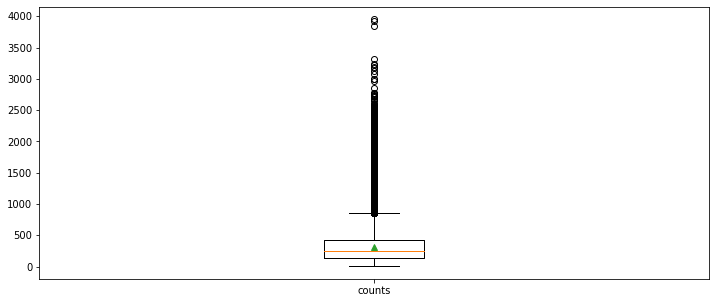

In [ ]:
length=train['요약문_연구목표'].astype(str).apply(len)
plt.hist(length, bins=50, alpha=0.5, color='r', label='word')
plt.title('histogram of length of summary_object')
plt.figure(figsize=(12, 5))
plt.boxplot(length, labels=['counts'], showmeans=True)
print('요약문_연구목표 길이 최댓값: {}'.format(np.max(length)))
print('요약문_연구목표 길이 최솟값: {}'.format(np.min(length)))
print('요약문_연구목표 길이 평균값: {}'.format(np.mean(length)))
print('요약문_연구목표 길이 중간값: {}'.format(np.median(length)))

In [ ]:
train_okt = pd.read_csv('/content/drive/MyDrive/dacon/train_okt.csv')#원하는 컬럼 가져오기                    
test_okt = pd.read_csv('/content/drive/MyDrive/dacon/test_okt.csv')

sample_submission = pd.read_csv('/content/drive/MyDrive/dacon/sample_submission.csv', header=0)
len(train_okt)
len(test_okt)


43576

In [ ]:
print(len(train_okt))
print(len(test_okt))
print(train_okt)


174304
43576
                                                        0   1
0                            유전정보를 활용한 새로운 해충 분류군 동정기술 개발  24
1       대장암의 TRAIL 내성 표적 인자 발굴 및 TRAIL 반응 예측 유전자 지도 구축...   0
2       비목질계 셀룰로오스 식물자원을 활용한 기능성 부직포 및 고부가가치 뷰티케어 faci...   0
3                                 소화기 암 진단용 분자영상 형광프로브 개발   0
4                             위암환자의 항암제반응예측을 위한 BRCA 발현검사   0
...                                                   ...  ..
174299                           혈관내막 증식을 치료하기 위한 표적분자 발굴   0
174300  삼킴곤란 개선을 위한 물성조절 식품시스템에서의 유동층과립 복합소재의 유변물성 변화 ...   0
174301                      식물 유전체 정보 고도화 및 핵심 유전자 군 진화연구   0
174302                   콩 유전자원 내건성, 내습성 대량평가 체계구축 및 자원선발  23
174303             광학적 위상 제어 기법을 적용한 디지털 홀로그래피 현미경 시스템 개발   0

[174304 rows x 2 columns]


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

#tokenizer 인자에는 list를 받아서 그대로 내보내는 함수를 넣어줍니다. 또한 소문자화를 하지 않도록 설정해야 에러가 나지 않습니다.
vectorizer = CountVectorizer(tokenizer = lambda x: x, lowercase=False)
train_features=vectorizer.fit_transform(train_okt['0'])
test_features=vectorizer.transform(test_okt['0'])
#test데이터에 fit_transform을 할 경우 data leakage에 해당합니다

In [ ]:
print(train_features.shape)
print(train_features)

(174304, 1832)
  (0, 1347)	1
  (0, 1389)	1
  (0, 1395)	2
  (0, 1071)	1
  (0, 943)	1
  (0, 2)	6
  (0, 1771)	1
  (0, 1324)	1
  (0, 1721)	1
  (0, 1128)	1
  (0, 914)	1
  (0, 1327)	1
  (0, 1727)	1
  (0, 1508)	1
  (0, 1082)	1
  (0, 936)	1
  (0, 606)	1
  (0, 805)	1
  (0, 632)	1
  (0, 1184)	1
  (0, 549)	1
  (0, 1035)	1
  (1, 1347)	1
  (1, 1389)	1
  (1, 2)	14
  :	:
  (174303, 632)	1
  (174303, 549)	1
  (174303, 1035)	1
  (174303, 1388)	2
  (174303, 1433)	1
  (174303, 1199)	1
  (174303, 1355)	1
  (174303, 1272)	1
  (174303, 1397)	1
  (174303, 1127)	1
  (174303, 598)	1
  (174303, 1341)	1
  (174303, 1755)	1
  (174303, 1205)	1
  (174303, 581)	1
  (174303, 1054)	1
  (174303, 1720)	1
  (174303, 881)	1
  (174303, 1712)	1
  (174303, 1619)	1
  (174303, 1019)	1
  (174303, 832)	1
  (174303, 1611)	1
  (174303, 623)	1
  (174303, 1764)	1


In [ ]:
#훈련 데이터 셋과 검증 데이터 셋으로 분리
TEST_SIZE=0.2
RANDOM_SEED=42

train_x, eval_x, train_y, eval_y=train_test_split(train_features, train['label'], test_size=TEST_SIZE, random_state=RANDOM_SEED)

In [ ]:
#랜덤포레스트로 모델링
from sklearn.ensemble import RandomForestClassifier

forest=RandomForestClassifier(n_estimators=100)

forest.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
#모델 검증
forest.score(eval_x, eval_y)

0.9136284099710278

In [ ]:
y_predict=forest.predict(test_features)
print(y_predict)


[0 0 0 ... 2 0 0]


In [ ]:
sample_submission['label']=y_predict
print(sample_submission)
sample_submission.to_csv('/content/drive/MyDrive/dacon/submission.csv', index=False)

        index  label
0      174304      0
1      174305      0
2      174306      0
3      174307      0
4      174308      0
...       ...    ...
43571  217875      0
43572  217876      0
43573  217877      2
43574  217878      0
43575  217879      0

[43576 rows x 2 columns]
